In [16]:
import pandas as pd
import statsmodels.api as sm

data = sm.datasets.co2.load_pandas()
data = pd.DataFrame(data.data)

In [17]:
data = data.resample('M').mean()
data = data.rename(columns={0: 'CO2'})


In [18]:
data = data.fillna(data.mean())

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, model='additive')

In [20]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

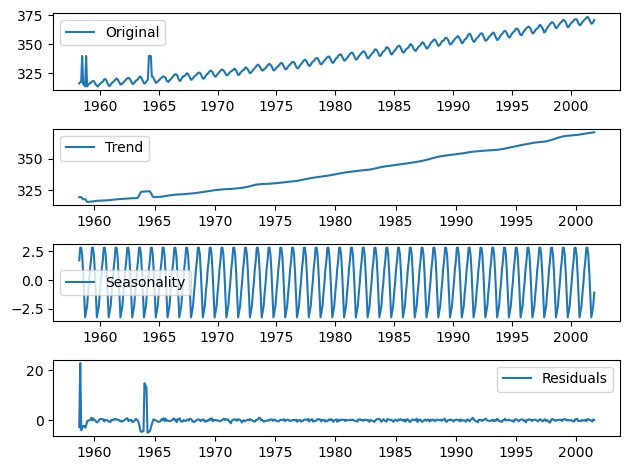

In [21]:
import matplotlib.pyplot as plt

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
